<a href="https://colab.research.google.com/github/vikashnitk/Stock-price-prediction/blob/master/multiInput_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 34.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c52564d131a12cc741e55bc37dd055b674ebc4dcb4d9f8b3906dd11982115439
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Import the plotting library 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
 
# Import the yfinance. 
import yfinance as yf   
 
# Get the data of the stock 
df = yf.download(tickers="IBULHSGFIN.NS", start="2020-06-01", end="2021-03-04") #year-mon-day
df=df.reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,125.000000,131.000000,124.000000,127.949997,127.949997,19158784
1,2020-06-02,128.399994,130.300003,124.699997,126.800003,126.800003,12604346
2,2020-06-03,129.000000,135.649994,128.000000,128.649994,128.649994,18711284
3,2020-06-04,128.649994,133.500000,125.800003,127.750000,127.750000,15509750
4,2020-06-05,129.699997,131.899994,127.000000,130.250000,130.250000,15448434
...,...,...,...,...,...,...,...
188,2021-02-25,220.000000,227.500000,220.000000,225.449997,225.449997,17937939
189,2021-02-26,220.000000,224.149994,214.600006,218.750000,218.750000,19284396
190,2021-03-01,222.000000,224.199997,216.850006,222.350006,222.350006,13980146
191,2021-03-02,224.250000,235.500000,223.250000,229.000000,229.000000,26294462


In [ ]:
bse = yf.download(tickers="^NSEI", start="2020-06-01", end="2021-03-04") #year-mon-day
bse=bse.reset_index()
bse=bse[['Date', 'Close']]
bse

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2020-06-01,9826.150391
1,2020-06-02,9979.099609
2,2020-06-03,10061.549805
3,2020-06-04,10029.099609
4,2020-06-05,10142.150391
...,...,...
187,2021-02-25,15097.349609
188,2021-02-26,14529.150391
189,2021-03-01,14761.549805
190,2021-03-02,14919.099609


In [ ]:
df2 = pd.merge(df, bse, how="left", on=['Date'])
df2

,Date,Open,High,Low,Close_x,Adj Close,Volume,Close_y
0,1999-02-01,15.568100,15.756800,15.228400,15.266200,0.528571,16937178,3265.909912
1,1999-02-02,15.209600,15.294500,14.851000,14.983100,0.518769,22914587,3236.760010
2,1999-02-03,14.992500,15.105800,14.737800,14.973700,0.518444,12570745,3277.570068
3,1999-02-04,15.002000,15.002000,14.577400,14.624600,0.506357,10082936,3236.419922
4,1999-02-05,14.624600,14.709500,14.303800,14.341500,0.496555,23681968,3215.350098
...,...,...,...,...,...,...,...,...
5428,2020-11-23,243.199997,246.100006,238.050003,238.699997,238.699997,3705630,44077.148438
5429,2020-11-24,240.899994,245.000000,239.449997,243.850006,243.850006,2958818,44523.019531
5430,2020-11-25,244.199997,249.800003,241.649994,243.149994,243.149994,3557909,43828.101562
5431,2020-11-26,244.399994,246.100006,240.300003,245.449997,245.449997,2935543,44259.738281


In [ ]:
df2['Day']= df2['Date'].apply(lambda x:x.weekday())
#df2['Day']= df2['Datetime'].apply(lambda x:x.weekday())
#df2['Hour']= df2['Datetime'].apply(lambda x:x.time())
#df2['Hour']= df2['Datetime'].apply(lambda x:x.hour)
df2

,Date,Open,High,Low,Close_x,Adj Close,Volume,Close_y,Day
0,1999-02-01,15.568100,15.756800,15.228400,15.266200,0.528571,16937178,3265.909912,0
1,1999-02-02,15.209600,15.294500,14.851000,14.983100,0.518769,22914587,3236.760010,1
2,1999-02-03,14.992500,15.105800,14.737800,14.973700,0.518444,12570745,3277.570068,2
3,1999-02-04,15.002000,15.002000,14.577400,14.624600,0.506357,10082936,3236.419922,3
4,1999-02-05,14.624600,14.709500,14.303800,14.341500,0.496555,23681968,3215.350098,4
...,...,...,...,...,...,...,...,...,...
5428,2020-11-23,243.199997,246.100006,238.050003,238.699997,238.699997,3705630,44077.148438,0
5429,2020-11-24,240.899994,245.000000,239.449997,243.850006,243.850006,2958818,44523.019531,1
5430,2020-11-25,244.199997,249.800003,241.649994,243.149994,243.149994,3557909,43828.101562,2
5431,2020-11-26,244.399994,246.100006,240.300003,245.449997,245.449997,2935543,44259.738281,3


In [ ]:
#df1=df2[['Close', 'Volume', 'Day', 'Hour']]
df1=df2[['Close_x','Open','High','Low', 'Volume', 'Day', 'Close_y']]
#df1=df2[['Close']]
df1

,Close_x,Open,High,Low,Volume,Day,Close_y
0,15.266200,15.568100,15.756800,15.228400,16937178,0,3265.909912
1,14.983100,15.209600,15.294500,14.851000,22914587,1,3236.760010
2,14.973700,14.992500,15.105800,14.737800,12570745,2,3277.570068
3,14.624600,15.002000,15.002000,14.577400,10082936,3,3236.419922
4,14.341500,14.624600,14.709500,14.303800,23681968,4,3215.350098
...,...,...,...,...,...,...,...
5428,238.699997,243.199997,246.100006,238.050003,3705630,0,44077.148438
5429,243.850006,240.899994,245.000000,239.449997,2958818,1,44523.019531
5430,243.149994,244.199997,249.800003,241.649994,3557909,2,43828.101562
5431,245.449997,244.399994,246.100006,240.300003,2935543,3,44259.738281


In [ ]:
df1=df1.interpolate()
print(df1.isnull().sum())
df1

Close_x    0
Open       0
High       0
Low        0
Volume     0
Day        0
Close_y    0
dtype: int64


,Close_x,Open,High,Low,Volume,Day,Close_y
0,15.266200,15.568100,15.756800,15.228400,16937178,0,3265.909912
1,14.983100,15.209600,15.294500,14.851000,22914587,1,3236.760010
2,14.973700,14.992500,15.105800,14.737800,12570745,2,3277.570068
3,14.624600,15.002000,15.002000,14.577400,10082936,3,3236.419922
4,14.341500,14.624600,14.709500,14.303800,23681968,4,3215.350098
...,...,...,...,...,...,...,...
5428,238.699997,243.199997,246.100006,238.050003,3705630,0,44077.148438
5429,243.850006,240.899994,245.000000,239.449997,2958818,1,44523.019531
5430,243.149994,244.199997,249.800003,241.649994,3557909,2,43828.101562
5431,245.449997,244.399994,246.100006,240.300003,2935543,3,44259.738281


In [ ]:
"""
df1=df1.iloc[0:-4]
df1
"""

'\ndf1=df1.iloc[0:-4]\ndf1\n'

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df1.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#scaled = values
# specify the number of lag hours
n_hours = 60
n_features = 7
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.tail())

      var1(t-60)  var2(t-60)  var3(t-60)  ...   var5(t)  var6(t)   var7(t)
5428    0.564210    0.547862    0.563193  ...  0.030778     0.00  0.989365
5429    0.589566    0.565713    0.589051  ...  0.024575     0.25  1.000000
5430    0.554179    0.606576    0.606012  ...  0.029551     0.50  0.983424
5431    0.570758    0.553580    0.569588  ...  0.024382     0.75  0.993720
5432    0.565464    0.571013    0.569866  ...  0.020521     1.00  0.991096

[5 rows x 427 columns]


In [ ]:
# split into train and test sets
values = reframed.values
#n_train_hours = 365 * 24
n_train_hours = int(len(df1)*0.90)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4889, 420) 4889 (4889,)
(4889, 60, 7) (4889,) (484, 60, 7) (484,)


Epoch 1/100
1223/1223 - 6s - loss: 0.0224 - val_loss: 0.0852
Epoch 2/100
1223/1223 - 4s - loss: 0.0215 - val_loss: 0.0675
Epoch 3/100
1223/1223 - 4s - loss: 0.0168 - val_loss: 0.0627
Epoch 4/100
1223/1223 - 4s - loss: 0.0139 - val_loss: 0.0618
Epoch 5/100
1223/1223 - 4s - loss: 0.0136 - val_loss: 0.0604
Epoch 6/100
1223/1223 - 4s - loss: 0.0125 - val_loss: 0.0595
Epoch 7/100
1223/1223 - 4s - loss: 0.0124 - val_loss: 0.0596
Epoch 8/100
1223/1223 - 4s - loss: 0.0130 - val_loss: 0.0576
Epoch 9/100
1223/1223 - 4s - loss: 0.0126 - val_loss: 0.0643
Epoch 10/100
1223/1223 - 4s - loss: 0.0115 - val_loss: 0.0542
Epoch 11/100
1223/1223 - 4s - loss: 0.0129 - val_loss: 0.0619
Epoch 12/100
1223/1223 - 4s - loss: 0.0122 - val_loss: 0.0526
Epoch 13/100
1223/1223 - 4s - loss: 0.0119 - val_loss: 0.0588
Epoch 14/100
1223/1223 - 5s - loss: 0.0115 - val_loss: 0.0616
Epoch 15/100
1223/1223 - 4s - loss: 0.0115 - val_loss: 0.0481
Epoch 16/100
1223/1223 - 4s - loss: 0.0116 - val_loss: 0.0571
Epoch 17/100
1223

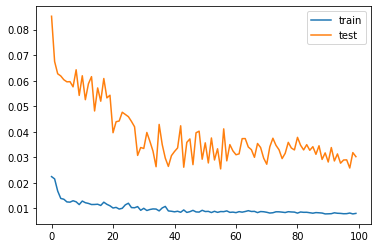

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.save("/content/drive/MyDrive/StockPrice_project/SBI_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load dataset
values1 = df1.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values1 = values1.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values1)
#scaled = values
# specify the number of lag hours
#n_hours = 19
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.head())

    var1(t-60)  var2(t-60)  var3(t-60)  ...   var5(t)  var6(t)   var7(t)
60    0.005587    0.005263    0.004761  ...  0.153580     0.75  0.025016
61    0.004798    0.004263    0.003476  ...  0.395367     1.00  0.026421
62    0.004772    0.003658    0.002951  ...  0.393242     0.00  0.029104
63    0.003799    0.003684    0.002663  ...  0.554000     0.25  0.031018
64    0.003010    0.002632    0.001850  ...  0.528317     0.50  0.030455

[5 rows x 427 columns]


In [ ]:
# split into train and test sets
values1 = reframed.values
#n_train_hours = 365 * 24
n_train_hours1 = int(len(df1)*0.15)
train1 = values1[:n_train_hours1, :]
test1 = values1[n_train_hours1:, :]
# split into input and outputs
n_obs = (n_hours * n_features)
train_X1, train_y1 = train1[:, :n_obs], train1[:, -n_features]
test_X1, test_y1 = test1[:, n_features:n_obs+n_features], test1[:, -n_features]
print(train_X1.shape, len(train_X1), train_y1.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X1 = train_X1.reshape((train_X1.shape[0], n_hours, n_features))
test_X1 = test_X1.reshape((test_X1.shape[0], n_hours, n_features))
print(train_X1.shape, train_y1.shape, test_X1.shape, test_y1.shape)

(814, 420) 814 (814,)
(814, 60, 7) (814,) (4559, 60, 7) (4559,)


In [ ]:
t=test_X1[-1]
t=t.reshape(1,-1)
t=list(t)
t=t[0].tolist()
t1=np.array(t)
t1=t1.reshape(1,-1)
t1=t1.reshape(1,n_hours,n_features)
pp=model.predict(t1)

In [ ]:
t2=test_X1[-1]
t2=t2.reshape(1,-1)
t2=list(t2)
t2=t2[0].tolist()
t2=np.array(t2)
t2=t2.reshape(1,-1)
t2=t2.reshape(1,n_hours,n_features)
t3 = t2.reshape((t2.shape[0], n_hours*n_features))
t3.shape

(1, 420)

In [ ]:
from numpy import concatenate
inv_pp = concatenate((pp, t3[:, 0:n_features-1]), axis=1)
inv_pp = scaler.inverse_transform(inv_pp)
inv_pp = inv_pp[:,0]
inv_pp

array([269.5978162])

In [ ]:
df1.tail(3)

,Close_x,Open,High,Low,Volume,Day,Close_y
5430,243.149994,244.199997,249.800003,241.649994,3557909,2,43828.101562
5431,245.449997,244.399994,246.100006,240.300003,2935543,3,44259.738281
5432,244.300003,246.000000,246.000000,242.000000,2470768,4,44149.718750


In [ ]:
df5 = yf.download(tickers="SBIN.BO", start="2020-12-02", end="2020-12-03") #year-mon-day
df5[['Close']].head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-12-02,246.800003
